In [1]:
import numpy as np
import pandas as pd

In [2]:
data = [['지원',10],['기범',20],['경수',30],['호영',40]]
df = pd.DataFrame(data,columns=['Name','Score'])
df

,Name,Score
0,지원,10
1,기범,20
2,경수,30
3,호영,40


In [3]:
bank_df = pd.read_csv('bank.csv')
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no


In [4]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


In [6]:
bank_df.isnull().sum()

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

<AxesSubplot:>

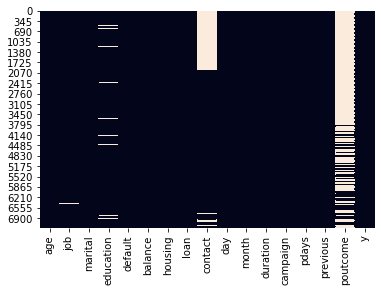

In [8]:
import seaborn as sns #결측치 시각화
sns.heatmap(bank_df.isnull(),cbar=False)

In [10]:
!pip install missingno #프롬프트 작업을 쥬피터에서 실행할때 !사용

<AxesSubplot:>

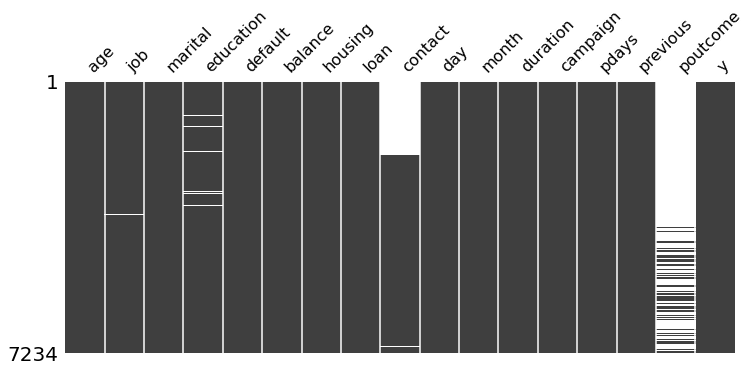

In [13]:
import missingno as msno
msno.matrix(bank_df, figsize=(12,5), sparkline=False)

<AxesSubplot:>

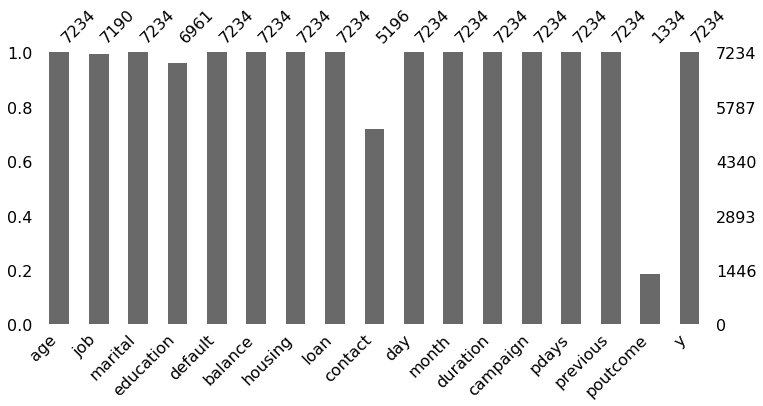

In [14]:
msno.bar(bank_df,figsize=(12,5))

In [15]:
#결측치를 포함한 행 삭제
print(bank_df.shape)
bank_df = bank_df.dropna(subset=['job','education'])
print(bank_df.shape)

(7234, 17)
(6935, 17)


In [18]:
#thresh -> x개 이상인 열을 삭제
bank_df = bank_df.dropna(thresh = 2400 , axis=1)
print(bank_df.shape)

(6935, 16)


In [21]:
bank_df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact      1925
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
y               0
dtype: int64

In [22]:
bank_df['contact'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: contact, dtype: object

In [23]:
bank_df = bank_df.fillna({'contact':'unknown'})

bank_df['contact'].head()

0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
Name: contact, dtype: object

In [32]:
time_index = pd.date_range("2020/01/01",periods=5, freq = "M")
time_index #월초로 하고 싶으면 MS, 3개월 주기 -> 3M

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

In [30]:
df = pd.DataFrame(index=time_index)
df["Sales"]=[1.0,2.0,np.nan,np.nan,5.0]
df

,Sales
2020-01-31,1.0
2020-02-29,2.0
2020-03-31,NaN
2020-04-30,NaN
2020-05-31,5.0


In [33]:
df.interpolate()

,Sales
2020-01-31,1.0
2020-02-29,2.0
2020-03-31,3.0
2020-04-30,4.0
2020-05-31,5.0


In [34]:
df.fillna(method="ffill")

,Sales
2020-01-31,1.0
2020-02-29,2.0
2020-03-31,2.0
2020-04-30,2.0
2020-05-31,5.0


In [35]:
df.fillna(method="bfill")

,Sales
2020-01-31,1.0
2020-02-29,2.0
2020-03-31,5.0
2020-04-30,5.0
2020-05-31,5.0


In [38]:
df.interpolate(limit=1,limit_direction="forward") #누락 값 보관

,Sales
2020-01-31,1.0
2020-02-29,2.0
2020-03-31,3.0
2020-04-30,NaN
2020-05-31,5.0


In [39]:
df.interpolate(limit=1,limit_direction="backward")

,Sales
2020-01-31,1.0
2020-02-29,2.0
2020-03-31,NaN
2020-04-30,4.0
2020-05-31,5.0


In [41]:
dict = {'One' :  [np.nan, np.nan, 95, 80], 
    'Two' : [np.nan, np.nan, np.nan, np.nan], 
    'Three':[52, np.nan, 80, 98], 
    'Four':[np.nan, np.nan, np.nan, 65],
    'Five':[10, None, 30, 40],
    'Six': [np.nan, np.nan, np.nan, pd.NaT],
    'Seven': [np.nan, np.nan, None, np.nan],
    'Eight': [np.nan, np.nan, None, pd.NaT]} 

pf=pd.DataFrame(dict)
pf

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [43]:
pf.dropna(how="all")

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [44]:
pf.dropna(how="all",axis=1)

,One,Three,Four,Five
0,NaN,52.0,NaN,10.0
1,NaN,NaN,NaN,NaN
2,95.0,80.0,NaN,30.0
3,80.0,98.0,65.0,40.0


In [46]:
pf.dropna(subset=['One','Four'])

,One,Two,Three,Four,Five,Six,Seven,Eight
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [47]:
pf.dropna(subset=['Eight'])

,One,Two,Three,Four,Five,Six,Seven,Eight


In [49]:
pf.isnull()

,One,Two,Three,Four,Five,Six,Seven,Eight
0,True,True,False,True,False,True,True,True
1,True,True,True,True,True,True,True,True
2,False,True,False,True,False,True,True,True
3,False,True,False,False,False,True,True,True


In [50]:
pf.isna()

,One,Two,Three,Four,Five,Six,Seven,Eight
0,True,True,False,True,False,True,True,True
1,True,True,True,True,True,True,True,True
2,False,True,False,True,False,True,True,True
3,False,True,False,False,False,True,True,True


In [51]:
pf.isna().sum()

One      2
Two      4
Three    1
Four     3
Five     1
Six      4
Seven    4
Eight    4
dtype: int64

In [52]:
pf.isna().sum().sum()

23

In [53]:
dict = {'First Score':[100, 90, None, 95, 85], 
        'Second Score': [30, 45, None, np.nan, 60], 
        'Third Score':[np.nan, 40, np.nan, 80, None]} 
df = pd.DataFrame(dict)
df

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [54]:
df.fillna(0)

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,0.0,0.0
3,95.0,0.0,80.0
4,85.0,60.0,0.0


In [55]:
df.replace(to_replace=100.00,value=120.0)

,First Score,Second Score,Third Score
0,120.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [56]:
df.replace(to_replace=np.nan,value=-50)

,First Score,Second Score,Third Score
0,100.0,30.0,-50.0
1,90.0,45.0,40.0
2,-50.0,-50.0,-50.0
3,95.0,-50.0,80.0
4,85.0,60.0,-50.0


In [57]:
df.interpolate(limit_direction='both')

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


In [58]:
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [59]:
df.duplicated() #행을 기준으로 검사

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [60]:
df['c2'].duplicated()

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [61]:
df.drop_duplicates()

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [62]:
df.drop_duplicates(subset=['c2','c3'])

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [64]:
df = pd.read_csv('stock-data.csv')
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [66]:
df['new_Date'] = pd.to_datetime(df['Date'])
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [70]:
df['new_Date'].dt.year

0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
Name: new_Date, dtype: int64

In [71]:
df['Year']=df['new_Date'].dt.year
df['Month']=df['new_Date'].dt.month
df['Day']=df['new_Date'].dt.day

In [72]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25,2018,6,25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22,2018,6,22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21,2018,6,21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20,2018,6,20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19,2018,6,19


In [79]:
bank_df[bank_df['age'] >= 18]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,no


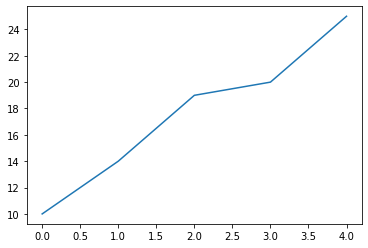

In [80]:
import matplotlib.pyplot as plt

x = [10,14,19,20,25] #x축은 인덱스로 들어감
plt.plot(x)
plt.show()

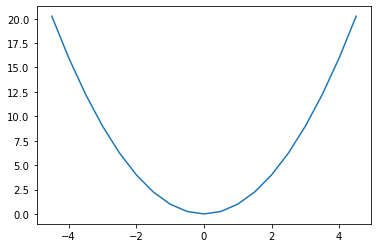

In [81]:
x = np.arange(-4.5,5,0.5)
y = x**2
plt.plot(x,y)
plt.show()

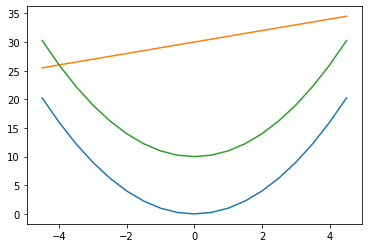

In [83]:
x = np.arange(-4.5,5,0.5)

y1 = x**2
y2 = x + 30
y3 = x**2+10

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

plt.show()

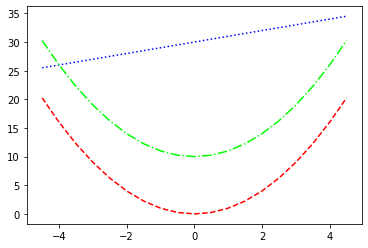

In [85]:
x = np.arange(-4.5,5,0.5)

y1 = x**2
y2 = x + 30
y3 = x**2+10

plt.plot(x,y1,color="red",linestyle="dashed")
plt.plot(x,y2,"b:")
plt.plot(x,y3,color="#00FF00",linestyle="-.")

plt.show()

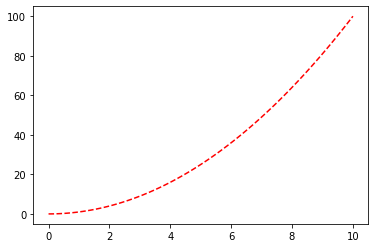

In [87]:
x = np.linspace(0,10,100)
y = x**2

plt.plot(x,y,'--r')
plt.show()

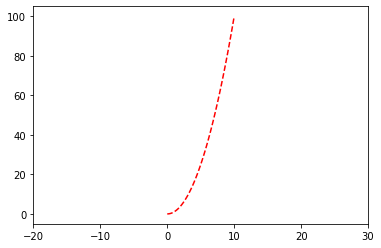

In [89]:
x = np.linspace(0,10,100)
y = x**2

plt.plot(x,y,'--r')
plt.xlim(-20,30)
plt.show()

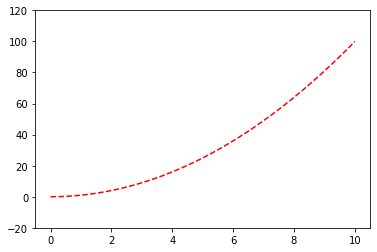

In [90]:
x = np.linspace(0,10,100)
y = x**2

plt.plot(x,y,'--r')
plt.ylim(-20,120)
plt.show()

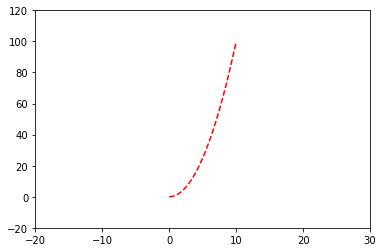

In [91]:
x = np.linspace(0,10,100)
y = x**2

plt.plot(x,y,'--r')
plt.axis([-20,30,-20,120])
plt.show()

In [95]:
plt.rc('font',family='Malgun Gothic')

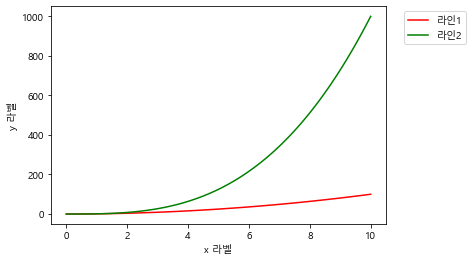

In [102]:
x = np.linspace(0,10,100)

y1 = x**2
y2 = x**3
#선 라벨
plt.plot(x,y1,'r',label='라인1')
plt.plot(x,y2,'g',label='라인2')
#축 라벨
plt.xlabel('x 라벨')
plt.ylabel('y 라벨')
#범례 위치
#plt.legend(loc=0)
plt.legend(bbox_to_anchor=(1.04,1))

plt.show()

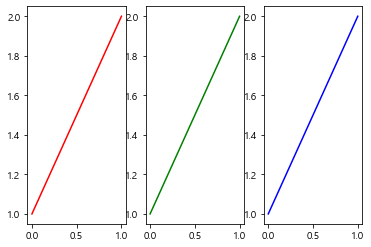

In [103]:
#plt.subplot(행,열,순번)

plt.subplot(131)
plt.plot([1,2],color='r')
plt.subplot(132)
plt.plot([1,2],color='g')
plt.subplot(133)
plt.plot([1,2],color='b')

plt.show()

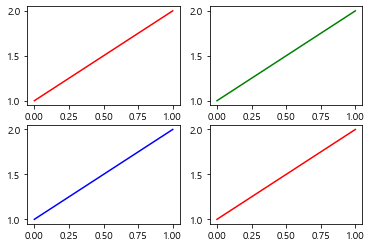

In [106]:
plt.subplot(221)
plt.plot([1,2],color='r')
plt.subplot(222)
plt.plot([1,2],color='g')
plt.subplot(223)
plt.plot([1,2],color='b')
plt.subplot(224)
plt.plot([1,2],color='r')

plt.show()

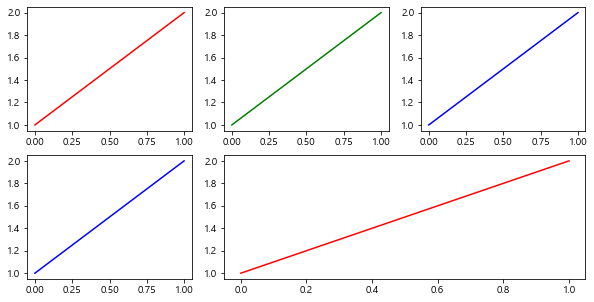

In [114]:
plt.figure(figsize=(10,5))#그래프전체크기
grid=plt.GridSpec(2,3)#GridSpec(행,열)

plt.subplot(grid[0,0])
plt.plot([1,2],color='r')
plt.subplot(grid[0,1])
plt.plot([1,2],color='g')
plt.subplot(grid[0,2])
plt.plot([1,2],color='b')
plt.subplot(grid[1,0])
plt.plot([1,2],color='b')
plt.subplot(grid[1,1:3])
plt.plot([1,2],color='r')
         
plt.show()

In [115]:
import matplotlib.pyplot as plt

In [116]:
x=np.random.rand(30)
y=np.random.rand(30)
a=np.random.rand(30)
b=np.random.rand(30)
e=np.random.rand(30)
f=np.random.rand(30)
color=np.random.rand(30)

size = 100 * np.random.rand(30)
size

array([74.65029068, 12.05613096, 87.24352479,  5.6603571 , 27.75554256,
       51.06935427, 41.78552589, 19.81145867, 78.12794241, 84.51259576,
       48.35494785, 29.13951992, 52.22198746, 54.19932861, 94.39371866,
        1.50938902, 86.65484213, 71.44329199,  1.84961361, 37.52999685,
       83.4535482 , 15.5186367 , 68.74483998, 95.26137501, 84.85479667,
       60.86086622, 57.44541192, 47.0967974 , 47.91549577,  7.47562159])

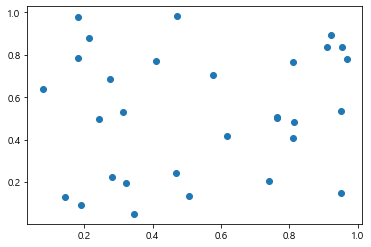

In [117]:
plt.scatter(x,y)

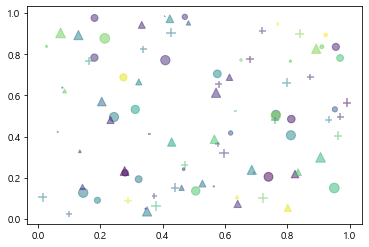

In [121]:
plt.scatter(x,y,s=size,c=color,alpha=0.5,marker='o')
plt.scatter(a,b,s=size,c=color,alpha=0.5,marker='^')
plt.scatter(e,f,s=size,c=color,alpha=0.5,marker='+')

plt.show()

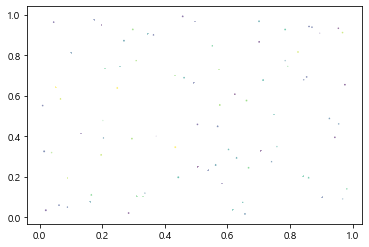

In [122]:
x=np.random.rand(30)
y=np.random.rand(30)
a=np.random.rand(30)
b=np.random.rand(30)
e=np.random.rand(30)
f=np.random.rand(30)
color=np.random.rand(30)

size = np.random.rand(30)

plt.scatter(x,y,s=size,c=color,alpha=0.5,marker='o')
plt.scatter(a,b,s=size,c=color,alpha=0.5,marker='^')
plt.scatter(e,f,s=size,c=color,alpha=0.5,marker='+')

plt.show()

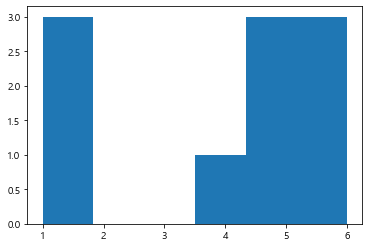

In [152]:
data = [np.random.randint(1,7) for i in range(10)]
plt.hist(data,bins=6,alpha=1)
plt.show()

<BarContainer object of 5 artists>

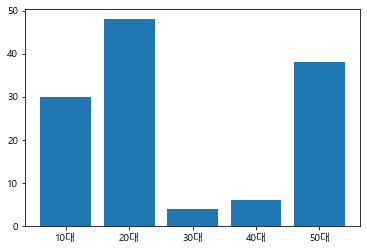

In [142]:
plt.bar(['10대','20대','30대','40대','50대'],[np.random.randint(1,50) for i in range(5)])

<BarContainer object of 5 artists>

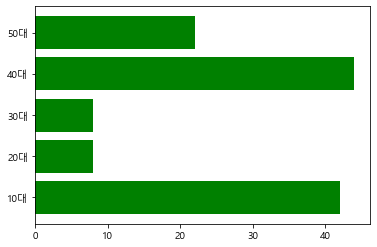

In [143]:
plt.barh(['10대','20대','30대','40대','50대'],[np.random.randint(1,50) for i in range(5)],color='g')

In [161]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,20대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,20대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,30대
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,20대
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,10대
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,20대
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,20대


In [153]:
def addrange(n):
    if n < 10:
        return "유아"
    elif n < 20:
        return "10대"
    elif n < 30:
        return "20대"
    elif n < 40:
        return "30대"
    elif n < 50:
        return "40대"
    elif n < 60:
        return "50대"
    elif n < 70:
        return "60대"
    else:
        return "노인"    

In [324]:
#Matplot 실습01

titanic = pd.read_csv('titanic_train.csv')

titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Cabin'].fillna("N",inplace=True)
titanic['Embarked'].fillna("N",inplace=True)

titanic['Age_Range'] = titanic['Age'].apply(addrange)

In [273]:
titanic_sex = titanic.groupby('Sex')['Survived'].sum()
titanic_Range = titanic.groupby('Age_Range')['Survived'].sum()

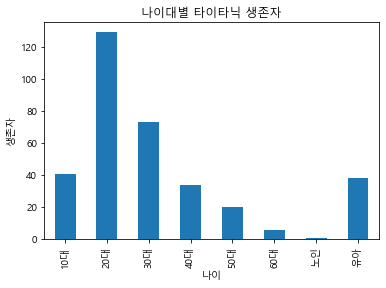

In [274]:
titanic_Range.plot.bar()

plt.title('나이대별 타이타닉 생존자')
plt.xlabel('나이')
plt.ylabel('생존자')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

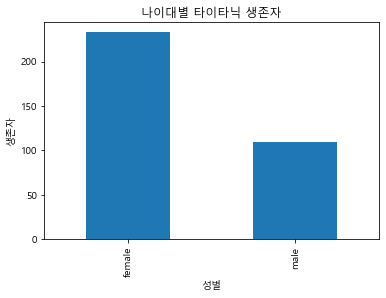

In [197]:
titanic_sex.plot.bar()

plt.title('나이대별 타이타닉 생존자')
plt.xlabel('성별')
plt.ylabel('생존자')
plt.show

In [202]:
covid = pd.read_csv('kr_daily.csv')
covid

,date,confirmed,death,released,candidate,negative
0,20200121,1,0,0,0,0
1,20200122,1,0,0,0,0
2,20200123,1,0,0,0,0
3,20200124,2,0,0,0,0
4,20200125,2,0,0,0,0
...,...,...,...,...,...,...
128,20200528,11344,269,10340,857322,834952
129,20200529,11402,269,10363,873718,849161
130,20200530,11441,269,10398,891460,865162
131,20200531,11468,270,10405,899354,876060


In [322]:
titanic_result_range

,Survived
Age_Range,
10대,41
20대,129
30대,73
40대,34
50대,20
60대,6
노인,1
유아,38


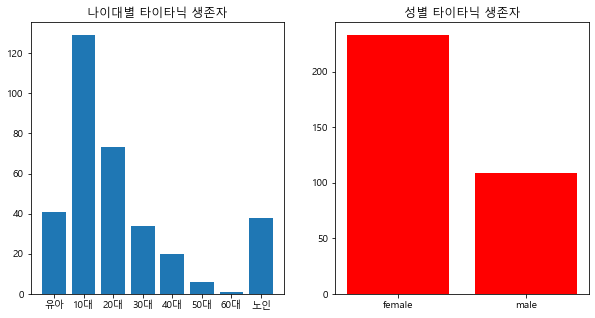

In [325]:
plt.figure(figsize=(10,5))
# 나이대별 타이타닉 생존자
plt.subplot(121)
x01 = ['유아','10대','20대','30대','40대','50대','60대','노인']
y01 = [titanic_Range[i] for i in range(len(titanic_Range))]
plt.bar(x01,y01)
plt.title('나이대별 타이타닉 생존자')
# 성별 타이타닉 생존자
plt.subplot(122)
x02 = ['female','male']
y02 = [titanic_sex[i] for i in range(len(titanic_sex))]
plt.bar(x02,y02,color='r')
plt.title('성별 타이타닉 생존자')
plt.show()

In [327]:
result = titanic.groupby('Age_Range')['Survived'].sum()

In [329]:
result=result.reindex(['유아','10대','20대','30대','40대','50대','60대','노인'])
result

Age_Range
유아      38
10대     41
20대    129
30대     73
40대     34
50대     20
60대      6
노인       1
Name: Survived, dtype: int64

In [330]:
result_survived = titanic.groupby('Sex')['Survived'].sum()

Text(0, 0.5, '생존자')

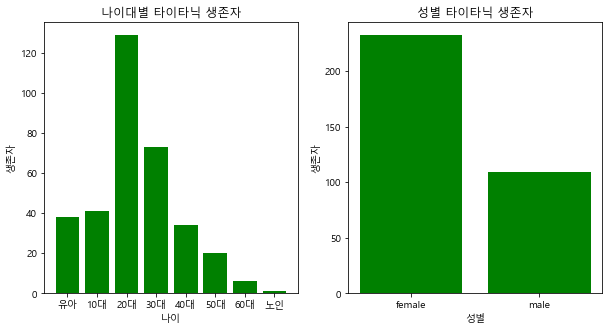

In [335]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.bar(result.index,result.values,color='g')
plt.title("나이대별 타이타닉 생존자")
plt.xlabel("나이")
plt.ylabel("생존자")

plt.subplot(122)
plt.bar(result_survived.index,result_survived.values,color='g')
plt.title("성별 타이타닉 생존자")
plt.xlabel("성별")
plt.ylabel("생존자")

In [211]:
from datetime import datetime

In [218]:
covid['new_date']= covid['date'].astype('str')

In [220]:
covid['new_date']= covid['new_date'].apply(lambda n : datetime.strptime(n,'%Y%m%d'))

In [310]:
date_x = covid[covid['new_date']>'2020-05-17']['new_date']
confirmed_x = covid[covid['new_date']>'2020-05-17']['confirmed']
death_x =covid[covid['new_date']>'2020-05-17']['death']

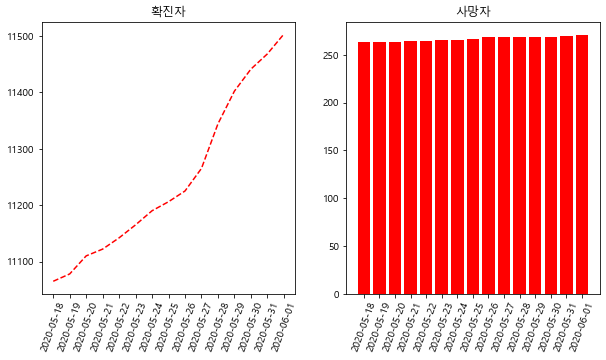

In [338]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(date_x,confirmed_x,color='r',linestyle='--')
plt.xticks(date_x,rotation=70)
plt.yticks(np.arange(11100,11600,100))
plt.title('확진자')

plt.subplot(122)
plt.bar(date_x,death_x,color='r')
plt.xticks(date_x,rotation=70)
plt.title('사망자')

plt.show()

In [341]:
covid.index = covid["new_date"]

In [342]:
covid

,date,confirmed,death,released,candidate,negative,new_date
new_date,,,,,,,
2020-01-21,20200121,1,0,0,0,0,2020-01-21
2020-01-22,20200122,1,0,0,0,0,2020-01-22
2020-01-23,20200123,1,0,0,0,0,2020-01-23
2020-01-24,20200124,2,0,0,0,0,2020-01-24
2020-01-25,20200125,2,0,0,0,0,2020-01-25
...,...,...,...,...,...,...,...
2020-05-28,20200528,11344,269,10340,857322,834952,2020-05-28
2020-05-29,20200529,11402,269,10363,873718,849161,2020-05-29
2020-05-30,20200530,11441,269,10398,891460,865162,2020-05-30


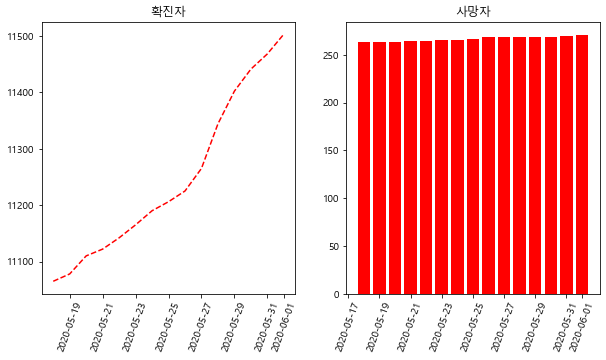

In [346]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(covid['2020-05-18':]['confirmed'].index,covid['2020-05-18':]['confirmed'].values,color='r',linestyle='--') #인덱스로 해서 슬라이싱으로 가져옴
plt.xticks(rotation=70)
plt.title('확진자')

plt.subplot(122)
plt.bar(covid['2020-05-18':]['death'].index,covid['2020-05-18':]['death'].values,color='r',linestyle='--')
plt.xticks(rotation=70)
plt.title('사망자')

plt.show()